<a href="https://colab.research.google.com/github/nocturnal-deviant/nocturnal-deviant/blob/main/Weather_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
df=pd.read_csv('/content/weather_ann.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [26]:
df.shape

(145460, 23)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [28]:
print(df.isna().sum())

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [29]:
df=df.drop(['Date'],axis=1)

In [34]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.0,0.0,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0.0,0.0
1,Albury,7.4,25.1,0.0,4.0,0.0,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0.0,0.0
2,Albury,12.9,25.7,0.0,4.0,0.0,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0.0,0.0
3,Albury,9.2,28.0,0.0,4.0,0.0,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0.0,0.0
4,Albury,17.5,32.3,1.0,4.0,0.0,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [35]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mode()[0])
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mode()[0])
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mode()[0])
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mode()[0])
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mode()[0])
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mode()[0])
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mode()[0])
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mode()[0])
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mode()[0])
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mode()[0])
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mode()[0])
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mode()[0])
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mode()[0])
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mode()[0])
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mode()[0])
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mode()[0])
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])

In [36]:
print(df.isna().sum())

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow      3267
dtype: int64


In [37]:
df['WindGustDir']=df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
print(df)

       Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          4.0       0.0   
1        Albury      7.4     25.1       0.0          4.0       0.0   
2        Albury     12.9     25.7       0.0          4.0       0.0   
3        Albury      9.2     28.0       0.0          4.0       0.0   
4        Albury     17.5     32.3       1.0          4.0       0.0   
...         ...      ...      ...       ...          ...       ...   
145455    Uluru      2.8     23.4       0.0          4.0       0.0   
145456    Uluru      3.6     25.3       0.0          4.0       0.0   
145457    Uluru      5.4     26.9       0.0          4.0       0.0   
145458    Uluru      7.8     27.0       0.0          4.0       0.0   
145459    Uluru     14.9     20.0       0.0          4.0       0.0   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  \
0                W           44.0          W        WNW  ...         71.0   
1    

In [38]:
df['WindDir9am']=df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm']=df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [39]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.0,0.0,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0.0,0.0
1,Albury,7.4,25.1,0.0,4.0,0.0,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0.0,0.0
2,Albury,12.9,25.7,0.0,4.0,0.0,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0.0,0.0
3,Albury,9.2,28.0,0.0,4.0,0.0,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0.0,0.0
4,Albury,17.5,32.3,1.0,4.0,0.0,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Location']=le.fit_transform(df['Location'])
df['WindGustDir']=le.fit_transform(df['WindGustDir'])
df['WindDir9am']=le.fit_transform(df['WindDir9am'])
df['WindDir3pm']=le.fit_transform(df['WindDir3pm'])

In [41]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,4.0,0.0,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0.0,0.0
1,2,7.4,25.1,0.0,4.0,0.0,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0.0,0.0
2,2,12.9,25.7,0.0,4.0,0.0,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0.0,0.0
3,2,9.2,28.0,0.0,4.0,0.0,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0.0,0.0
4,2,17.5,32.3,1.0,4.0,0.0,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int64  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int64  
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int64  
 9   WindDir3pm     145460 non-null  int64  
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [43]:
df=df.dropna()

In [69]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,4.0,0.0,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0.0,0.0
1,2,7.4,25.1,0.0,4.0,0.0,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0.0,0.0
2,2,12.9,25.7,0.0,4.0,0.0,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0.0,0.0
3,2,9.2,28.0,0.0,4.0,0.0,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0.0,0.0
4,2,17.5,32.3,1.0,4.0,0.0,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41,3.5,21.8,0.0,4.0,0.0,0,31.0,2,0,...,59.0,27.0,1024.7,1021.2,7.0,7.0,9.4,20.9,0.0,0.0
145455,41,2.8,23.4,0.0,4.0,0.0,0,31.0,9,1,...,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0.0,0.0
145456,41,3.6,25.3,0.0,4.0,0.0,6,22.0,9,3,...,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,0.0,0.0
145457,41,5.4,26.9,0.0,4.0,0.0,3,37.0,9,14,...,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,0.0,0.0


In [44]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145454    0.0
145455    0.0
145456    0.0
145457    0.0
145458    0.0
Name: RainTomorrow, Length: 142193, dtype: float64

<Axes: xlabel='MaxTemp', ylabel='MinTemp'>

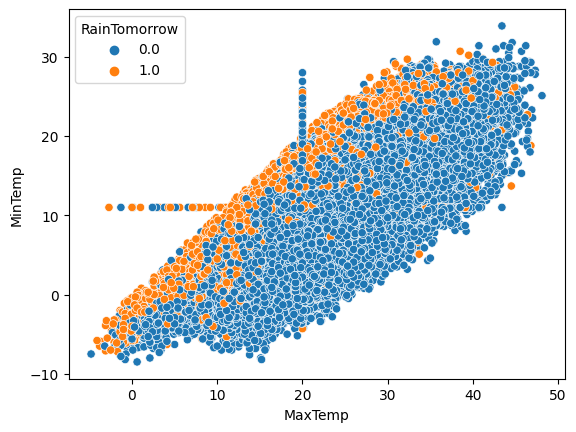

In [55]:
sns.scatterplot(x='MaxTemp',y='MinTemp',hue='RainTomorrow',data=df)

<Axes: xlabel='Humidity9am', ylabel='Temp9am'>

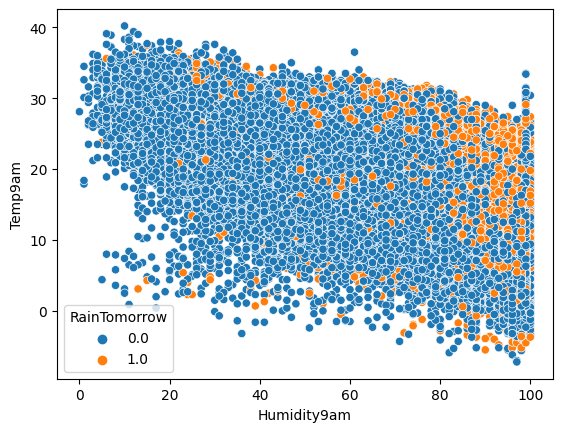

In [56]:
sns.scatterplot(x='Humidity9am',y='Temp9am',hue='RainTomorrow',data=df)

<Axes: xlabel='Sunshine', ylabel='Rainfall'>

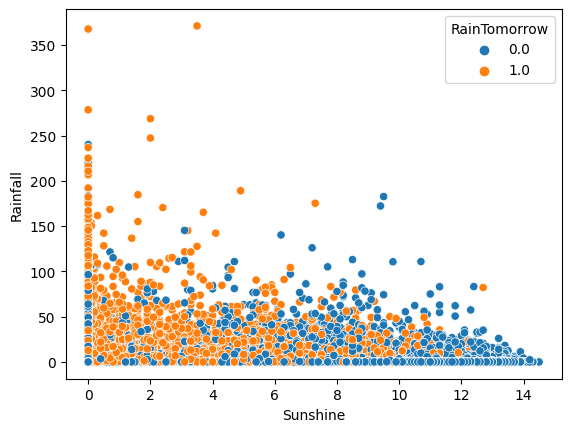

In [57]:
sns.scatterplot(x='Sunshine',y='Rainfall',hue='RainTomorrow',data=df)

<Axes: >

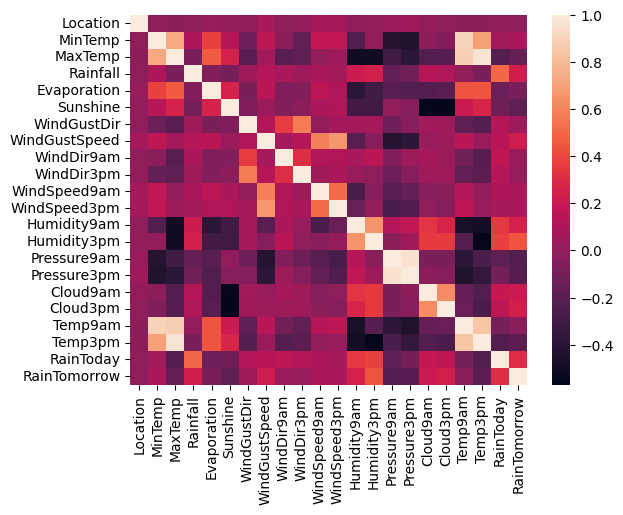

In [58]:
sns.heatmap(df.corr())

Text(0.5, 0, 'Prob of Rain')

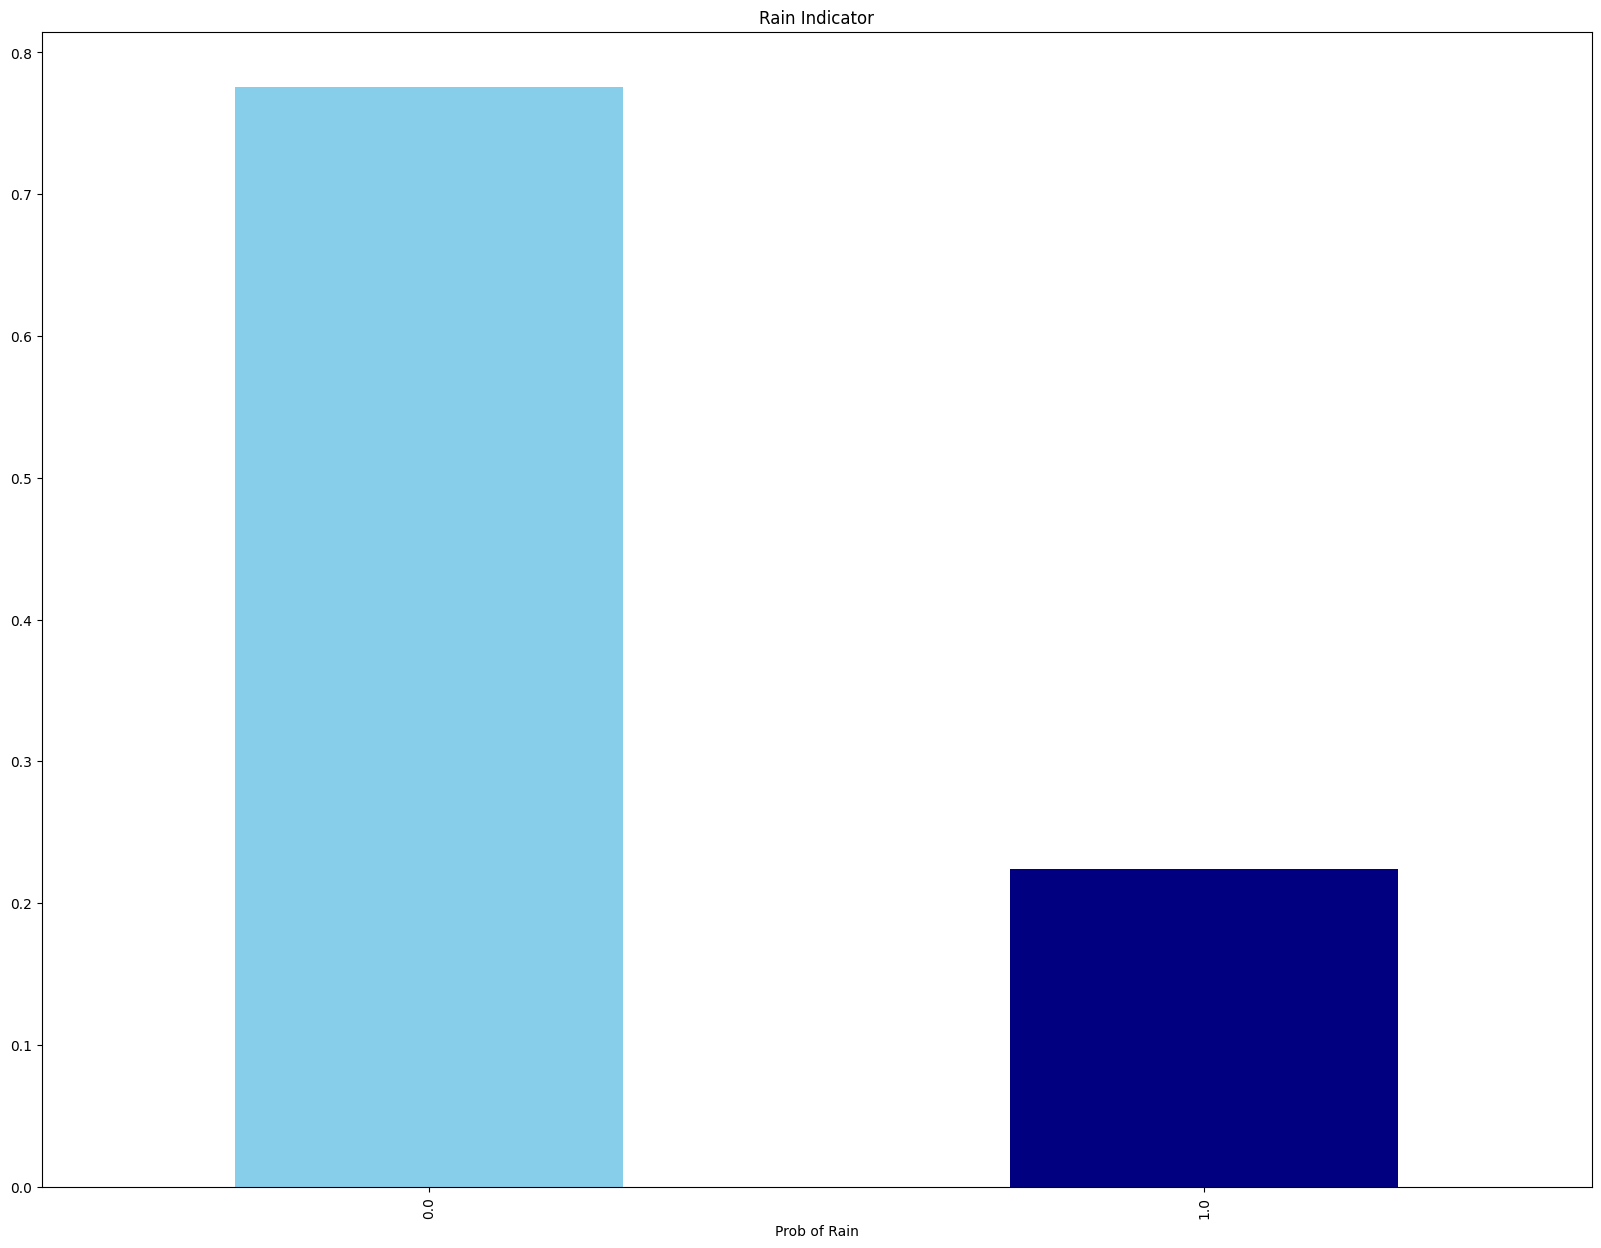

In [59]:
fig = plt.figure(figsize = (20,15))
ax=df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'])
plt.title('Rain Indicator')
plt.xlabel('Prob of Rain')

In [60]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)

In [62]:
from keras.src.layers.serialization import activation
ann=tf.keras.models.Sequential()

In [63]:
ann.add(tf.keras.layers.Dense(6,activation='relu'))

In [65]:
ann.add(tf.keras.layers.Dense(6,activation='relu'))

In [66]:
ann.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [67]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [68]:
ann.fit(xtrain,ytrain,batch_size=100,epochs=150)

Epoch 1/150
996/996 [==============================] - 5s 2ms/step - loss: 0.4560 - accuracy: 0.8027
Epoch 2/150
996/996 [==============================] - 2s 2ms/step - loss: 0.3805 - accuracy: 0.8356
Epoch 3/150
996/996 [==============================] - 2s 2ms/step - loss: 0.3764 - accuracy: 0.8379
Epoch 4/150
996/996 [==============================] - 2s 2ms/step - loss: 0.3744 - accuracy: 0.8385
Epoch 5/150
996/996 [==============================] - 3s 3ms/step - loss: 0.3727 - accuracy: 0.8391
Epoch 6/150
996/996 [==============================] - 2s 2ms/step - loss: 0.3712 - accuracy: 0.8403
Epoch 7/150
996/996 [==============================] - 2s 2ms/step - loss: 0.3700 - accuracy: 0.8404
Epoch 8/150
996/996 [==============================] - 3s 3ms/step - loss: 0.3689 - accuracy: 0.8412
Epoch 9/150
996/996 [==============================] - 2s 2ms/step - loss: 0.3682 - accuracy: 0.8409
Epoch 10/150
996/996 [==============================] - 2s 2ms/step - loss: 0.3675 - accura

In [73]:
pred=ann.predict(scaler.transform([[2,13.4,22.9,0.6,4.0,0.0,13,44.0,13,14,71.0,22.0,9.45,3.53,1007.7,1007.1,8.0,7.0,16.9,21.8,0.0]]))
if pred>0:
  print('Rain=',1)
else:
  print('Rain=',0)

1/1 [==============================] - 0s 43ms/step
Rain= 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [74]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 132       
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
ann.evaluate(xtest,ytest)

1334/1334 [==============================] - 4s 3ms/step - loss: 0.3595 - accuracy: 0.8437


[0.35946983098983765, 0.8436635732650757]